<a href="https://colab.research.google.com/github/samarth-91/NLP-sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library import karna yaha



In [ ]:
import numpy as np
import pandas as pd
import json
import openpyxl
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading  and cleaning dataset

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/Post Admission Process - Feedback Form (Responses).xlsx", engine="openpyxl")

In [ ]:
df.head()

,I found the admission/registration process easy to follow,Information about the admission process was easy to access,Any queries about the admission/registration process were answered promptly,I was supplied with the receipt of admission/payment/document submitted when completed the process,Did you consider other Institutes before enrolling to VIIT?,Why did you choose to study at VIIT?,My first impression of VIIT are,Suggestions/Comments
0,2.0,2.0,2.0,Yes,No,"Excellent Teaching Learning culture, Excellent Faculties",Nice,NaN
1,1.0,1.0,1.0,Yes,No,"Excellent Teaching Learning culture, Top Engineering Institute in Pune","Good facilities, Positive environment",NaN
2,3.0,3.0,3.0,Yes,No,Excellent Infrastructure and Facilities,Great,NaN
3,1.0,2.0,2.0,Yes,No,Excellent Faculties,Superb,I'm glad to be here for btech with Excellent faculty
4,1.0,1.0,1.0,Yes,No,"Excellent Teaching Learning culture, Excellent Results, Excellent Faculties, Excellent Placements, Top Engineering Institute in Pune, Excellent Infrastructure and Facilities",Perfect learning platform.... Having good placements ... Good results... Top engineering college in Pune..,No any suggestions....


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 8 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   I found the admission/registration process easy to follow                                           650 non-null    float64
 1   Information about the admission process was easy to access                                          646 non-null    float64
 2   Any queries about the admission/registration process were answered promptly                         646 non-null    float64
 3   I was supplied with the receipt of admission/payment/document submitted when completed the process  652 non-null    object 
 4   Did you consider other Institutes before enrolling to VIIT?                                         632 non-null    o

In [ ]:
df.isnull().sum()  #checking if anu null value present

I found the admission/registration process easy to follow                                              17
Information about the admission process was easy to access                                             21
Any queries about the admission/registration process were answered promptly                            21
I was supplied with the receipt of admission/payment/document submitted when completed the process     15
Did you consider other Institutes before enrolling to VIIT?                                            35
Why did you choose to study at VIIT?                                                                   37
My first impression of VIIT are                                                                       222
Suggestions/Comments                                                                                  381
dtype: int64

In [ ]:
df["My first impression of VIIT are"].fillna("",inplace=True)
df["Suggestions/Comments"].fillna("",inplace=True)
df["Why did you choose to study at VIIT?"].fillna("",inplace=True)

In [ ]:
print(df["I was supplied with the receipt of admission/payment/document submitted when completed the process"].unique())

['Yes' nan 'No']


In [ ]:
df['I was supplied with the receipt of admission/payment/document submitted when completed the process']=np.where(df["I was supplied with the receipt of admission/payment/document submitted when completed the process"]=="Yes",1,0)

In [ ]:
df['Did you consider other Institutes before enrolling to VIIT?']=np.where(df["Did you consider other Institutes before enrolling to VIIT?"]=="Yes",1,0)

In [ ]:
df['I found the admission/registration process easy to follow'].fillna(int(np.mean(df['I found the admission/registration process easy to follow'])),inplace=True)
df['Any queries about the admission/registration process were answered promptly '].fillna(int(np.mean(df['Any queries about the admission/registration process were answered promptly '])),inplace=True)
df["Information about the admission process was easy to access"].fillna(int(np.mean(df['Information about the admission process was easy to access'])),inplace=True)

In [ ]:
df.isnull().sum()

I found the admission/registration process easy to follow                                             0
Information about the admission process was easy to access                                            0
Any queries about the admission/registration process were answered promptly                           0
I was supplied with the receipt of admission/payment/document submitted when completed the process    0
Did you consider other Institutes before enrolling to VIIT?                                           0
Why did you choose to study at VIIT?                                                                  0
My first impression of VIIT are                                                                       0
Suggestions/Comments                                                                                  0
dtype: int64

In [ ]:

# Function to remove special characters
def remove_special_characters(text):
    return ''.join(e for e in text if e.isalnum() or e.isspace())



In [ ]:
#removing special characters from textual comments
df['Why did you choose to study at VIIT?']= df['Why did you choose to study at VIIT?'].apply(remove_special_characters)
df['My first impression of VIIT are']=df['My first impression of VIIT are'].apply(remove_special_characters)
df['Suggestions/Comments']=df['Suggestions/Comments'].apply(remove_special_characters)

In [ ]:
df['Combined']=df['Why did you choose to study at VIIT?']+df['My first impression of VIIT are']+df['Suggestions/Comments']
df['Combined']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Excellent Teaching Learning culture Excellent FacultiesNice
1                                                                                                                                     

# Implementing Textblob model for prediction

In [ ]:
from textblob import TextBlob
def apply_textblob(df):
    def pred(text):
        # Analyze sentiment
        analysis = TextBlob(text)

        # Get the polarity score
        polarity = analysis.sentiment.polarity

        # Classify sentiment based on polarity
        if polarity > 0:
            sentiment = "positive"
        elif polarity < 0:
            sentiment = "negative"
        else:
            sentiment = "neutral"

        return sentiment

    df['sentiment']=df['Combined'].apply(pred)

In [ ]:
df['sentiment'].value_counts()

POSITIVE    633
NEUTRAL      33
NEGATIVE      1
Name: sentiment, dtype: int64

# Using hugging face transformer

In [ ]:
def apply_transformer(df):
    sentiment_analysis = pipeline("sentiment-analysis")

    def trans(text):
        result = sentiment_analysis(text)
        return result[0]['label']
    output =[]
    for index,row in df.iterrows():
        try:
            text = row['Combined']
        #     print(text
            result = trans(text)
            output.append(result)
            print(f"Done with {index+1}/{len(df)}")
        except Exception as e:
            output.append("")
            print(f"error at index : {index},\nError:{e}")

    df['Transformer']=output

In [ ]:
from transformers import pipeline

# Load a pretrained sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

# Analyze sentiment for a text
result = sentiment_analysis("I love this product. It's amazing!")

def trans(text):
    result = sentiment_analysis(text)
    return result[0]['label']


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
output =[]
for index,row in df.iterrows():
    try:
        text = row['Combined']
    #     print(text
        result = trans(text)
        output.append(result)
        print(f"Done with {index+1}/{len(df)}")
    except Exception as e:
        output.append("")
        print(f"error at index : {index},\nError:{e}")



Done with 1/667
Done with 2/667
Done with 3/667
Done with 4/667
Done with 5/667
Done with 6/667
Done with 7/667
Done with 8/667
Done with 9/667
Done with 10/667
Done with 11/667
Done with 12/667
Done with 13/667
Done with 14/667
Done with 15/667
Done with 16/667
Done with 17/667
Done with 18/667
Done with 19/667
Done with 20/667
Done with 21/667
Done with 22/667
Done with 23/667
Done with 24/667
Done with 25/667
Done with 26/667
Done with 27/667
Done with 28/667
Done with 29/667
Done with 30/667
Done with 31/667
Done with 32/667
Done with 33/667
Done with 34/667
Done with 35/667
Done with 36/667
Done with 37/667
Done with 38/667
Done with 39/667
Done with 40/667
Done with 41/667
Done with 42/667
Done with 43/667
Done with 44/667
Done with 45/667
Done with 46/667
Done with 47/667
Done with 48/667
Done with 49/667
Done with 50/667
Done with 51/667
Done with 52/667
Done with 53/667
Done with 54/667
Done with 55/667
Done with 56/667
Done with 57/667
Done with 58/667
Done with 59/667
Done w

In [ ]:
df['Transformer']=output

In [ ]:
df['sentiment']=df['sentiment'].apply(lambda x : x.upper())

In [ ]:
df[df['Transformer']!=df['sentiment']]

,I found the admission/registration process easy to follow,Information about the admission process was easy to access,Any queries about the admission/registration process were answered promptly,I was supplied with the receipt of admission/payment/document submitted when completed the process,Did you consider other Institutes before enrolling to VIIT?,Why did you choose to study at VIIT?,My first impression of VIIT are,Suggestions/Comments,Combined,sentiment,Transformer
15,2.0,2.0,1.0,1,1,Excellent Placements,gud,the garbage near by should be removed,Excellent Placementsgudthe garbage near by should be removed,POSITIVE,NEGATIVE
16,1.0,1.0,1.0,0,0,,,,,NEUTRAL,POSITIVE
40,3.0,4.0,5.0,1,0,,Good campus,The the time for admission process can be saved a lot more if separate pdf file is listed on college website for the order of document set also mention how many xerox sets of original documents in website\nThis can save a lot of time for students who regularly check the college website,Good campusThe the time for admission process can be saved a lot more if separate pdf file is listed on college website for the order of document set also mention how many xerox sets of original documents in website\nThis can save a lot of time for students who regularly check the college website,POSITIVE,NEGATIVE
42,3.0,4.0,4.0,1,0,Top Engineering Institute in Pune,Badiya lga mere ko toh,,Top Engineering Institute in PuneBadiya lga mere ko toh,NEUTRAL,POSITIVE
44,1.0,1.0,1.0,0,0,,,,,NEUTRAL,POSITIVE
63,3.0,3.0,3.0,1,0,Excellent Placements,Good,Nothing,Excellent PlacementsGood Nothing,POSITIVE,NEGATIVE
70,2.0,2.0,1.0,1,1,Excellent Placements Top Engineering Institute in Pune Excellent Infrastructure and Facilities,Placement,Surrounding of college is not so good,Excellent Placements Top Engineering Institute in Pune Excellent Infrastructure and FacilitiesPlacement Surrounding of college is not so good,POSITIVE,NEGATIVE
74,1.0,1.0,1.0,1,0,Top Engineering Institute in Pune,Very Good,No Suggestion,Top Engineering Institute in PuneVery Good No Suggestion,POSITIVE,NEGATIVE
78,2.0,2.0,1.0,1,0,,,,,NEUTRAL,POSITIVE
84,5.0,5.0,5.0,1,1,,,,,NEUTRAL,POSITIVE


In [ ]:
df.to_excel("Output.xlsx",index=True)

In [ ]:
from openpyxl import load_workbook

In [ ]:
workbook = load_workbook(r"/content/drive/MyDrive/Post Admission Process - Feedback Form (Responses).xlsx")


In [ ]:
df2 = pd.DataFrame()

for sheet in workbook.sheetnames:
    curr_df = pd.read_excel(r"/content/drive/MyDrive/Post Admission Process - Feedback Form (Responses).xlsx",sheet_name=sheet)
    curr_df["year"]= sheet
#     display(curr_df)
    df2 = pd.concat([df2,curr_df])


In [ ]:
df2.isnull().sum()

I found the admission/registration process easy to follow                                               52
Information about the admission process was easy to access                                              62
Any queries about the admission/registration process were answered promptly                             69
I was supplied with the receipt of admission/payment/document submitted when completed the process      50
Did you consider other Institutes before enrolling to VIIT?                                            130
Why did you choose to study at VIIT?                                                                   134
My first impression of VIIT are                                                                       1001
Suggestions/Comments                                                                                  2005
year                                                                                                     0
dtype: int64

In [ ]:
df2["My first impression of VIIT are"].fillna("",inplace=True)
df2["Suggestions/Comments"].fillna("",inplace=True)
df2["Why did you choose to study at VIIT?"].fillna("",inplace=True)
df2['I was supplied with the receipt of admission/payment/document submitted when completed the process']=np.where(df2["I was supplied with the receipt of admission/payment/document submitted when completed the process"]=="Yes",1,0)
df2['Did you consider other Institutes before enrolling to VIIT?']=np.where(df2["Did you consider other Institutes before enrolling to VIIT?"]=="Yes",1,0)
df2['I found the admission/registration process easy to follow'].fillna(int(np.mean(df2['I found the admission/registration process easy to follow'])),inplace=True)
df2['Any queries about the admission/registration process were answered promptly '].fillna(int(np.mean(df2['Any queries about the admission/registration process were answered promptly '])),inplace=True)
df2["Information about the admission process was easy to access"].fillna(int(np.mean(df2['Information about the admission process was easy to access'])),inplace=True)

In [ ]:
df2.isnull().sum()

I found the admission/registration process easy to follow                                             0
Information about the admission process was easy to access                                            0
Any queries about the admission/registration process were answered promptly                           0
I was supplied with the receipt of admission/payment/document submitted when completed the process    0
Did you consider other Institutes before enrolling to VIIT?                                           0
Why did you choose to study at VIIT?                                                                  0
My first impression of VIIT are                                                                       0
Suggestions/Comments                                                                                  0
year                                                                                                  0
dtype: int64

In [ ]:
df2['Combined']=df2['Why did you choose to study at VIIT?']+df2['My first impression of VIIT are']+df2['Suggestions/Comments']

In [ ]:
apply_textblob(df2)

In [ ]:
apply_transformer(df2)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Done with 1/3310
Done with 2/3310
Done with 3/3310
Done with 4/3310
Done with 5/3310
Done with 6/3310
Done with 7/3310
Done with 8/3310
Done with 9/3310
Done with 10/3310
Done with 11/3310
Done with 12/3310
Done with 13/3310
Done with 14/3310
Done with 15/3310
Done with 16/3310
Done with 17/3310
Done with 18/3310
Done with 19/3310
Done with 20/3310
Done with 21/3310
Done with 22/3310
Done with 23/3310
Done with 24/3310
Done with 25/3310
Done with 26/3310
Done with 27/3310
Done with 28/3310
Done with 29/3310
Done with 30/3310
Done with 31/3310
Done with 32/3310
Done with 33/3310
Done with 34/3310
Done with 35/3310
Done with 36/3310
Done with 37/3310
Done with 38/3310
Done with 39/3310
Done with 40/3310
Done with 41/3310
Done with 42/3310
Done with 43/3310
Done with 44/3310
Done with 45/3310
Done with 46/3310
Done with 47/3310
Done with 48/3310
Done with 49/3310
Done with 50/3310
Done with 51/3310
Done with 52/3310
Done with 53/3310
Done with 54/3310
Done with 55/3310
Done with 56/3310
D

In [ ]:
2

positive    3187
neutral      117
negative       6
Name: sentiment, dtype: int64
POSITIVE    3166
NEGATIVE     144
Name: Transformer, dtype: int64


In [ ]:
df2[df2['Transformer']=="NEGATIVE"]

,I found the admission/registration process easy to follow,Information about the admission process was easy to access,Any queries about the admission/registration process were answered promptly,I was supplied with the receipt of admission/payment/document submitted when completed the process,Did you consider other Institutes before enrolling to VIIT?,Why did you choose to study at VIIT?,My first impression of VIIT are,Suggestions/Comments,year,Combined,sentiment,Transformer
14,1.0,2.0,2.0,1,0,Top Engineering Institute in Pune,Very nice campus and faculty was very helpful during the admission process,Only 2 drawback \n1. girls hostel is quite far away from the viit campus \n2 .no gym provided neither by viit nor in the hostel,23-24,Top Engineering Institute in PuneVery nice campus and faculty was very helpful during the admission process Only 2 drawback \n1. girls hostel is quite far away from the viit campus \n2 .no gym provided neither by viit nor in the hostel,positive,NEGATIVE
15,2.0,2.0,1.0,1,1,Excellent Placements,gud,the garbage near by should be removed,23-24,Excellent Placementsgudthe garbage near by should be removed,positive,NEGATIVE
40,3.0,4.0,5.0,1,0,,Good campus,"The the time for admission process can be saved a lot more if separate pdf file is listed on college website for the order of document set, also mention how many xerox sets of original documents in website.\nThis can save a lot of time for students who regularly check the college website.",23-24,"Good campusThe the time for admission process can be saved a lot more if separate pdf file is listed on college website for the order of document set, also mention how many xerox sets of original documents in website.\nThis can save a lot of time for students who regularly check the college website.",positive,NEGATIVE
63,3.0,3.0,3.0,1,0,Excellent Placements,Good,Nothing,23-24,Excellent PlacementsGood Nothing,positive,NEGATIVE
70,2.0,2.0,1.0,1,1,"Excellent Placements, Top Engineering Institute in Pune, Excellent Infrastructure and Facilities",Placement,Surrounding of college is not so good,23-24,"Excellent Placements, Top Engineering Institute in Pune, Excellent Infrastructure and FacilitiesPlacement Surrounding of college is not so good",positive,NEGATIVE
74,1.0,1.0,1.0,1,0,Top Engineering Institute in Pune,Very Good,No Suggestion,23-24,Top Engineering Institute in PuneVery Good No Suggestion,positive,NEGATIVE
78,2.0,2.0,1.0,1,0,,👍,,23-24,👍,neutral,NEGATIVE
98,3.0,3.0,2.0,1,1,Top Engineering Institute in Pune,"Beautiful campus,cooperative teachers","All good ,no suggestions🥰🥰😇",23-24,"Top Engineering Institute in PuneBeautiful campus,cooperative teachersAll good ,no suggestions🥰🥰😇",positive,NEGATIVE
108,1.0,2.0,1.0,1,1,"Excellent Placements, Top Engineering Institute in Pune",Big Campus and seniors are supporters.,One of the teacher is very rude.,23-24,"Excellent Placements, Top Engineering Institute in PuneBig Campus and seniors are supporters.One of the teacher is very rude.",positive,NEGATIVE
127,1.0,2.0,1.0,1,1,Top Engineering Institute in Pune,Best collage,Best collage,23-24,Top Engineering Institute in PuneBest collageBest collage,positive,NEGATIVE


In [ ]:
df2.to_excel("output2.xlsx",index=False)

In [ ]:
#reoving special characters from textual comments
df2['Why did you choose to study at VIIT?']= df2['Why did you choose to study at VIIT?'].apply(remove_special_characters)
df2['My first impression of VIIT are']=df2['My first impression of VIIT are'].apply(remove_special_characters)
df2['Suggestions/Comments']=df2['Suggestions/Comments'].apply(remove_special_characters)
df2['Combined']=df2['Combined'].apply(remove_special_characters)

In [ ]:
df2=pd.read_excel("output2.xlsx")

# Vizualiazing Results


In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt

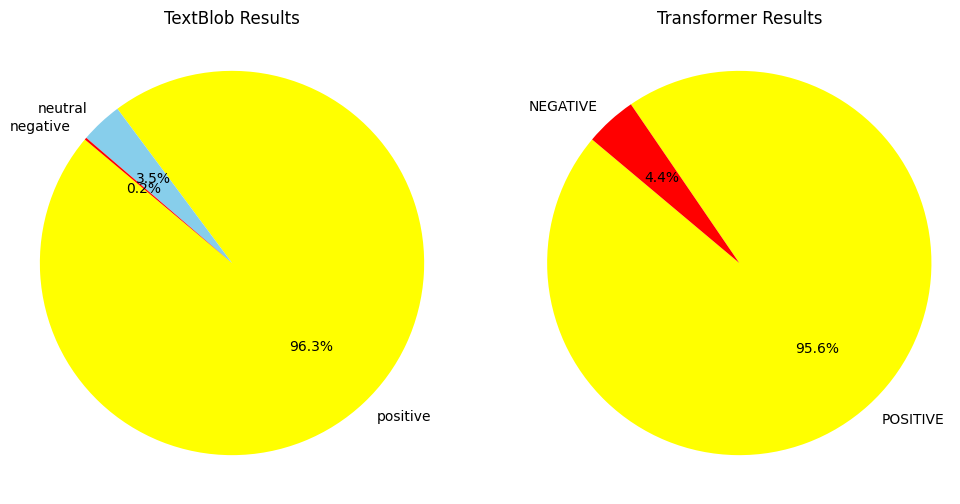

In [ ]:
import matplotlib.pyplot as plt
def plot_graph(df2):
        sentimemts_count=dict(df2['sentiment'].value_counts())
        transformer_count=dict(df2['Transformer'].value_counts())

        # Define colors for the pie charts
        colors = ['yellow', 'skyblue', 'red']
        color1 = ['yellow', 'red']
        # Create a figure with subplots (1 row, 2 columns)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Create the first pie chart for TextBlob results
        axs[0].pie(sentimemts_count.values(), labels=sentimemts_count.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
        axs[0].set_title('TextBlob Results')
        axs[0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

        # Create the second pie chart for Transformer results
        axs[1].pie(transformer_count.values(), labels=transformer_count.keys(), colors=color1, autopct='%1.1f%%', startangle=140)
        axs[1].set_title('Transformer Results')
        axs[1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

        # Display the subplots
        plt.show()
plot_graph(df2)

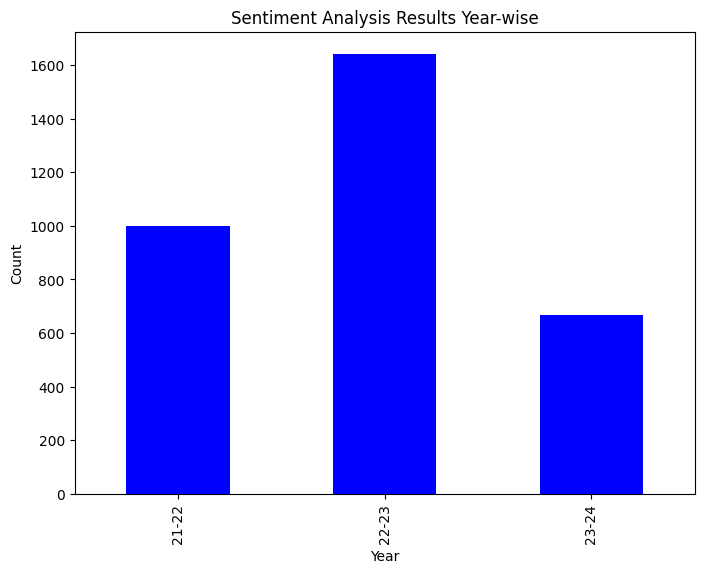

In [ ]:
plt.figure(figsize=(8, 6))
df2['year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Sentiment Analysis Results Year-wise')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [ ]:
grp=df2.groupby(by=['year'])

Year wise data:
Results for year: 21-22


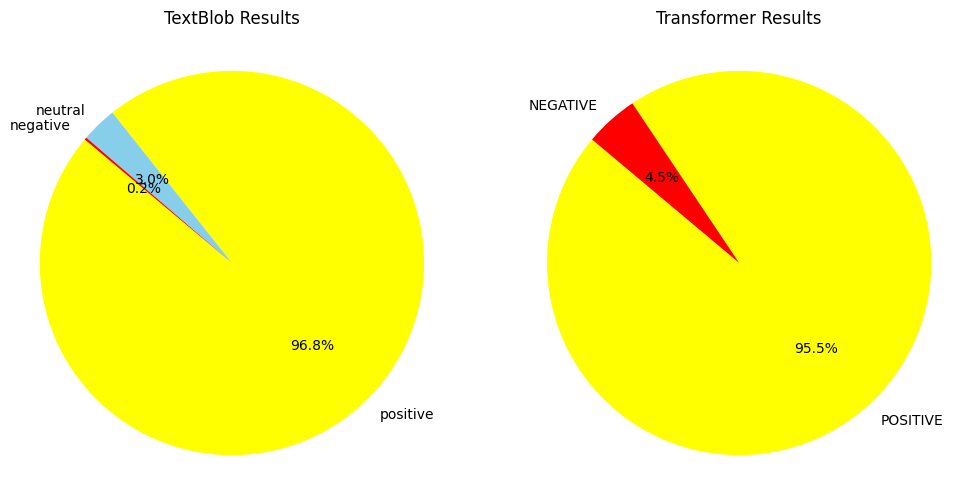

Results for year: 22-23


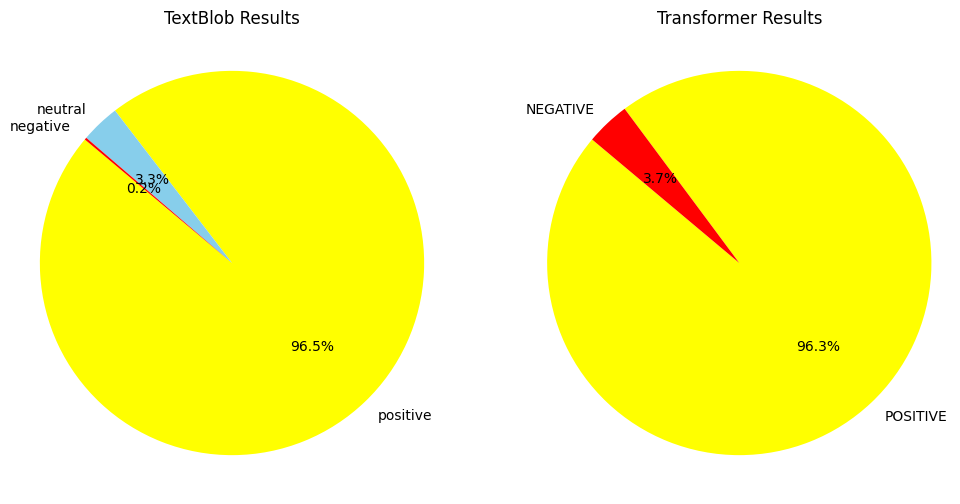

Results for year: 23-24


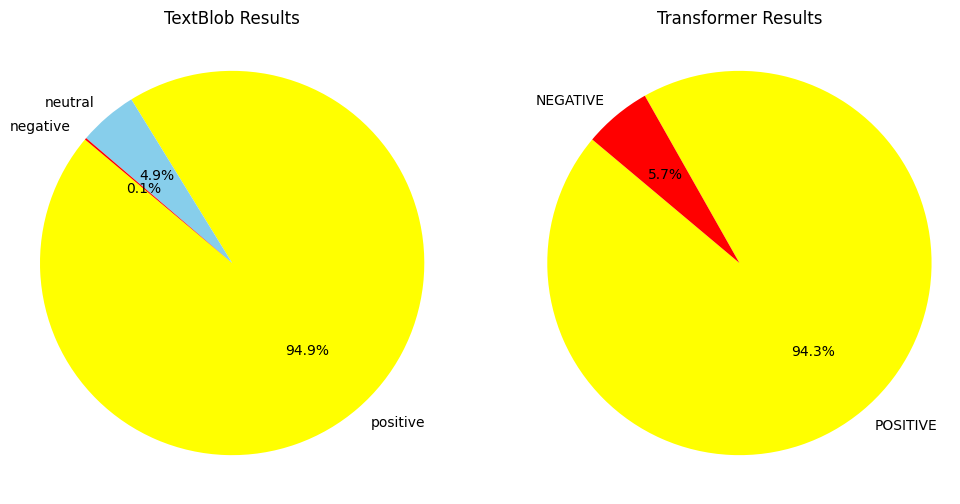

In [ ]:
print(f"Year wise data:")
for grpno , data in grp:
    print(f"Results for year: {grpno}")
    plot_graph(data)

In [ ]:
correct_predictions = df[df['predicted_sentiment'] == df['sentiment']]
accuracy = len(correct_predictions) / len(df)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 0.00%
